In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as sklearn_accuracy_score,classification_report,confusion_matrix


In [ ]:
data=pd.read_csv('emissions_reduction_data.csv')
print(data.head())

   energy_efficiency  renewable_ratio  technology_cost  emission_reduction
0          68.727006         0.373641      7569.984799                   0
1          97.535715         0.332912      2660.607960                   0
2          86.599697         0.176154      4119.757249                   0
3          79.932924         0.607267      6969.525732                   1
4          57.800932         0.476624      5338.804101                   0
   energy_efficiency  renewable_ratio  technology_cost  emission_reduction
0          68.727006         0.373641      7569.984799                   0
1          97.535715         0.332912      2660.607960                   0
2          86.599697         0.176154      4119.757249                   0
3          79.932924         0.607267      6969.525732                   1
4          57.800932         0.476624      5338.804101                   0


In [ ]:
data.shape

(10000, 4)

In [ ]:
data['emission_reduction'].value_counts()

,count
emission_reduction,
0,8321
1,1679


,count
emission_reduction,
0,8321
1,1679


In [ ]:
data.isnull().sum()

,0
energy_efficiency,0
renewable_ratio,0
technology_cost,0
emission_reduction,0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_efficiency   10000 non-null  float64
 1   renewable_ratio     10000 non-null  float64
 2   technology_cost     10000 non-null  float64
 3   emission_reduction  10000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 312.6 KB


Scatter plot


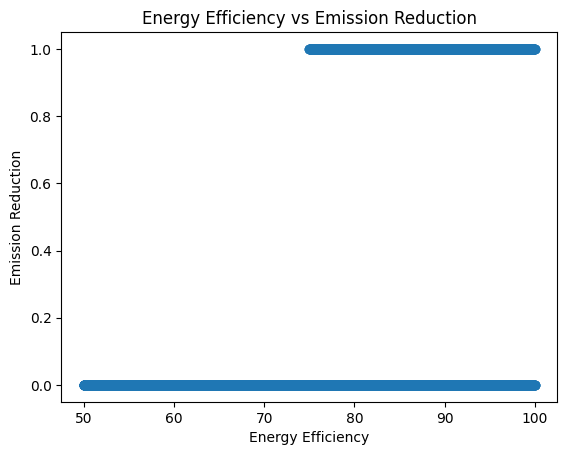

In [ ]:
print("Scatter plot")

plt.figure()
plt.scatter(data['energy_efficiency'], data['emission_reduction'])
plt.xlabel('Energy Efficiency')
plt.ylabel('Emission Reduction')
plt.title('Energy Efficiency vs Emission Reduction')
plt.show()


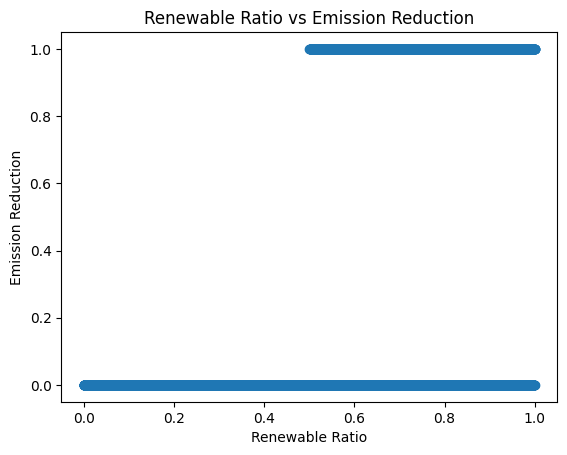

In [ ]:
plt.figure()
plt.scatter(data['renewable_ratio'], data['emission_reduction'])
plt.xlabel('Renewable Ratio')
plt.ylabel('Emission Reduction')
plt.title('Renewable Ratio vs Emission Reduction')
plt.show()

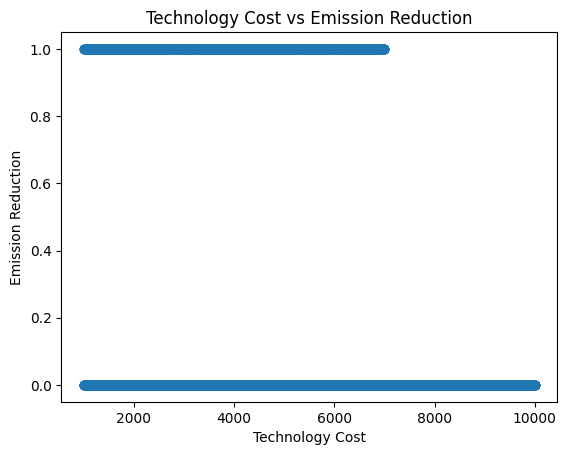

In [ ]:
plt.figure()
plt.scatter(data['technology_cost'], data['emission_reduction'])
plt.xlabel('Technology Cost')
plt.ylabel('Emission Reduction')
plt.title('Technology Cost vs Emission Reduction')
plt.show()


In [ ]:
x=data[['energy_efficiency','renewable_ratio','technology_cost']]
y=data['emission_reduction']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
k=5
model=KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
#acccuracy

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

Accuracy : 0.99


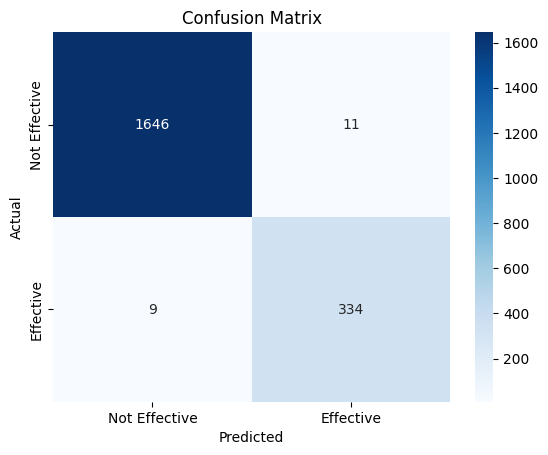

In [ ]:
#confusion matrix

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',
            xticklabels=['Not Effective','Effective'],
            yticklabels=['Not Effective','Effective'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Classification Report

print(classification_report(y_test,y_pred,target_names=['Not Effective','Effective']))

               precision    recall  f1-score   support

Not Effective       0.99      0.99      0.99      1657
    Effective       0.97      0.97      0.97       343

     accuracy                           0.99      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.99      0.99      0.99      2000



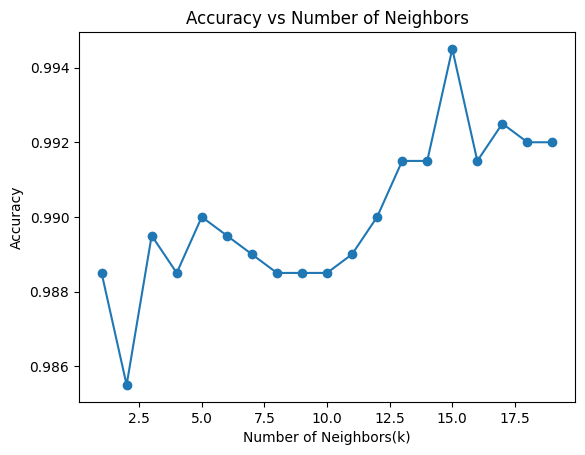

In [ ]:
# trying different values for k


accuracy_scores_list = []
k_values = range(1,20)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_scores_list.append(sklearn_accuracy_score(y_test,y_pred))

# plot accuracy vs k
plt.plot(k_values,accuracy_scores_list,marker='o')
plt.xlabel('Number of Neighbors(k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors')
plt.show()